In [1]:
import keras
import glob 
import os
import tensorflow as tf
import random
from utils import imgs_input_fn, imgs_input_fn_val, rmse, build_model
import mdn
from mdn import sample_from_output
import pandas as pd
from tqdm import tqdm
import imageio
import numpy as np
from mdn import sample_from_output
import matplotlib.pyplot as plt
from utils import build_model, find_closest_element, Fy
from scipy.stats import norm
import multiprocessing

#define paths
# directory where checkpoints should be saved
model_dir = '../../../../data/models/mdn_cil/export/'
checkpoint_path = '../../../../data/models/mdn_cil/export/'

In [2]:
samples = np.load('../../../../data/commaai/predictions/mdn/cil/samples.npy')

In [3]:
samples.shape

(94570, 1000)

In [4]:
pred_mdn = np.mean(samples, axis = 1)

In [8]:
# define model and load weights from training
keras_model = build_model()

# load weights
keras_model.load_weights(tf.train.latest_checkpoint(checkpoint_path)) 

In [9]:
# read in val data
path_all_imgs = '../../../../commaai_code/02_write_shards_optional/cil_shards/df_paths.csv'
all_img_df = pd.read_csv(path_all_imgs)
all_img_df = all_img_df[np.abs(all_img_df['true_y']) < 40].reset_index()
img_path_base = '../../../data/commaai/train_bags_2/'
true_y = all_img_df['true_y']

density_path = '../../../../data/commaai/density/gaussian_density.csv'
density = pd.read_csv(density_path)

no_samp = 1000

# preds Bzetas by reading in images and predicting
preds = []
samples = []
labels  = []
for i in tqdm(range(0,50)): 
    img = imageio.imread(str(img_path_base + all_img_df.loc[i,'path']))[:,:,0:3]/255
    pred = keras_model.predict(img.reshape(1,66,200,3))   
    y_samples = np.array([np.apply_along_axis(sample_from_output, 1, pred, 1, 50, temp=1.0) for i in range(0,no_samp)])
    samples.append(y_samples)
    label = all_img_df.loc[i,'true_y']
    labels.append(label) 
    preds.append(pred)

100%|██████████| 50/50 [01:03<00:00,  1.28s/it]


In [10]:
samples = np.array(samples)
pred_mdn = np.mean(samples.reshape(-1, 1000), axis = 1)

In [12]:
all_img_df.loc[3,'path']

'../../../../data/commaai/test_files/val_files_unfiltered/image3_0.png'

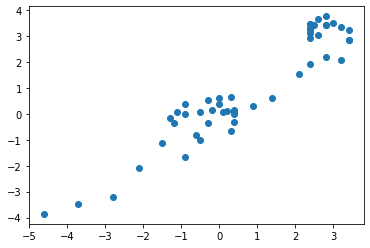

In [11]:
plt.scatter(all_img_df.loc[0:pred_mdn.shape[0] -1,'true_y'], pred_mdn)

In [2]:
labels = list(np.load('../../../../data/commaai/predictions/mdn/cil/labels.npy'))

In [4]:
len(labels)

72730

In [9]:
path_all_imgs = '../../../../commaai_code/02_write_shards_optional/cil_shards/df_paths.csv'
all_img_df = pd.read_csv(path_all_imgs)
all_img_df = all_img_df[np.abs(all_img_df['true_y']) < 40].reset_index()
true_y = all_img_df['true_y']

In [10]:
labels = true_y

In [11]:
labels.shape

(94570,)

In [ ]:
pred_mdn = np.mean(samples.reshape(-1, 1000), axis = 1)

In [ ]:
np.save('../../../../data/commaai/predictions/mdn/cpl/mdn_preds.npy', np.array(pred_mdn))

In [12]:
print("Performance of models without and with uncertainty" +
     "\nMSE:" +
      "\nwith uncertainty: " + str(np.mean((labels - pred_mdn.reshape(-1,))**2)) +
      "\nMAE:" +
      "\nwith uncertainty: " + str(np.mean(np.abs(labels - pred_mdn.reshape(-1,)))) +
      "\nAccuracy :" +
      "\nwith uncertainty: " + str(np.mean([np.abs((labels - pred_mdn.reshape(-1,))) <= 6])) +
      "\nAccuracy II:" +
      "\nwith uncertainty: " + str(np.mean([np.abs(labels - pred_mdn.reshape(-1,)) <= 2])) 
     )

Performance of models without and with uncertainty
MSE:
with uncertainty: 10.57918096232381
MAE:
with uncertainty: 1.7171217230179903
Accuracy :
with uncertainty: 0.9484297345881357
Accuracy II:
with uncertainty: 0.7642910013746431


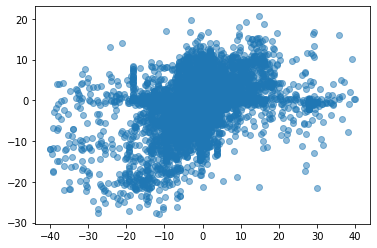

In [13]:
plt.scatter(labels, pred_mdn, alpha = 0.5)

In [ ]:
pred_mdn.shape

In [ ]:
all_img_df.loc[0:692,'true_z'].shape